In [63]:
#Controlador difuso
#importamos las librerias que vamos a usar
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

In [64]:
#Variables de entrada

dinero_ahorro = ctrl.Antecedent(np.arange(0,501,1),'Cantidad de dinero ahorrado')
salario = ctrl.Antecedent(np.arange(0,16,1),'salario mensaual')

#Variable de salida

cliente_preferencial = ctrl.Consequent(np.arange(0,101), 'cliente preferencial')

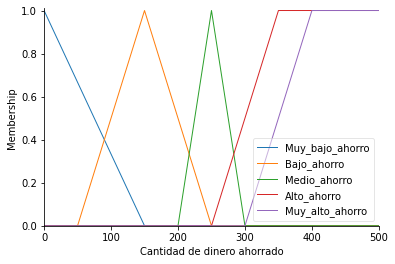

In [65]:
#Funciones de membresia 

# Dinero ahorrado muy bajo - bajo - medio - alto - muy alto

dinero_ahorro['Muy_bajo_ahorro'] = fuzz.trimf(dinero_ahorro.universe,[0,0,150])
dinero_ahorro['Bajo_ahorro'] = fuzz.trimf(dinero_ahorro.universe,[50,150,250])
dinero_ahorro['Medio_ahorro'] = fuzz.trimf(dinero_ahorro.universe,[200,250,300])
dinero_ahorro['Alto_ahorro'] = fuzz.trapmf(dinero_ahorro.universe,[250,350,500,500])
dinero_ahorro['Muy_alto_ahorro'] = fuzz.trapmf(dinero_ahorro.universe,[300,400,500,500])

dinero_ahorro.view()

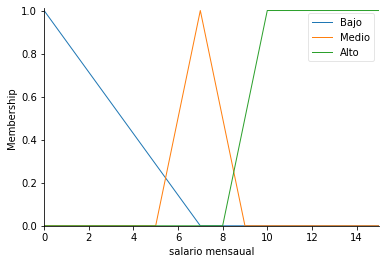

In [66]:
#Salario muy bueno - bueno - bajo
 
salario['Bajo'] = fuzz.trimf(salario.universe,[0,0,7])
salario['Medio'] = fuzz.trimf(salario.universe,[5,7,9])
salario['Alto'] = fuzz.trapmf(salario.universe,[8,10,15,15])

salario.view()

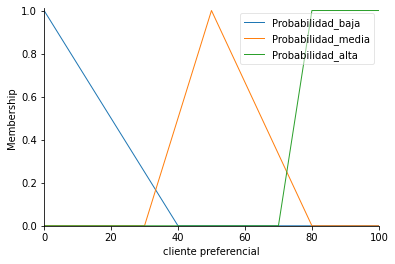

In [67]:
#Variables de salida
#Cliente preferencial baja - media - alta

cliente_preferencial['Probabilidad_baja'] = fuzz.trimf(cliente_preferencial.universe,[0,0,40])
cliente_preferencial['Probabilidad_media'] = fuzz.trimf(cliente_preferencial.universe,[30,50,80])
cliente_preferencial['Probabilidad_alta'] = fuzz.trapmf(cliente_preferencial.universe,[70,80,100,100])

cliente_preferencial.view()


In [68]:
#Crear reglas difusas

regla_11 = ctrl.Rule(salario['Bajo']&dinero_ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['Probabilidad_baja'])
regla_12 = ctrl.Rule(salario['Bajo']&dinero_ahorro['Bajo_ahorro'] ,cliente_preferencial['Probabilidad_baja'])
regla_13 = ctrl.Rule(salario['Bajo']&dinero_ahorro['Medio_ahorro'] ,cliente_preferencial['Probabilidad_baja'])
regla_14 = ctrl.Rule(salario['Bajo']&dinero_ahorro['Alto_ahorro'] ,cliente_preferencial['Probabilidad_media'])
regla_15 = ctrl.Rule(salario['Bajo']&dinero_ahorro['Muy_alto_ahorro'] ,cliente_preferencial['Probabilidad_media'])

regla_21 = ctrl.Rule(salario['Medio']&dinero_ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['Probabilidad_baja'])
regla_22 = ctrl.Rule(salario['Medio']&dinero_ahorro['Bajo_ahorro'] ,cliente_preferencial['Probabilidad_baja'])
regla_23 = ctrl.Rule(salario['Medio']&dinero_ahorro['Medio_ahorro'] ,cliente_preferencial['Probabilidad_media'])
regla_24 = ctrl.Rule(salario['Medio']&dinero_ahorro['Alto_ahorro'] ,cliente_preferencial['Probabilidad_media'])
regla_25 = ctrl.Rule(salario['Medio']&dinero_ahorro['Muy_alto_ahorro'] ,cliente_preferencial['Probabilidad_alta'])

regla_31 = ctrl.Rule(salario['Alto']&dinero_ahorro['Muy_bajo_ahorro'] ,cliente_preferencial['Probabilidad_media'])
regla_32 = ctrl.Rule(salario['Alto']&dinero_ahorro['Bajo_ahorro'] ,cliente_preferencial['Probabilidad_media'])
regla_33 = ctrl.Rule(salario['Alto']&dinero_ahorro['Medio_ahorro'] ,cliente_preferencial['Probabilidad_alta'])
regla_34 = ctrl.Rule(salario['Alto']&dinero_ahorro['Alto_ahorro'] ,cliente_preferencial['Probabilidad_alta'])
regla_35 = ctrl.Rule(salario['Alto']&dinero_ahorro['Muy_alto_ahorro'] ,cliente_preferencial['Probabilidad_alta'])


In [69]:
#Sistema de control

sistema_control = ctrl.ControlSystem(
    [
        regla_11,
        regla_12,
        regla_13,
        regla_14,
        regla_15,
        regla_21,
        regla_22,
        regla_23,
        regla_24,
        regla_25,
        regla_31,
        regla_32,
        regla_33,
        regla_34,
        regla_35
    ]
)

controlador = ctrl.ControlSystemSimulation(sistema_control)

In [70]:
#Dinero ahoorado 500 millones y salario mensual 15 millones
#Que probabilidad de ser cliente preferencial??


controlador.input['Cantidad de dinero ahorrado']= 500
controlador.input['salario mensaual']= 15

controlador.compute()

#Resultado

Probablidad_total = controlador.output['cliente preferencial']
print(f"la probablidad es : {Probablidad_total}%")

la probablidad es : 87.33333333333331%
